<a href="https://colab.research.google.com/github/Thiago-Mauricio/Curso-de-python/blob/master/QuarentenaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

AULA 01

In [104]:
print('Olá mundo')

Olá mundo


In [105]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [106]:
avaliações = pd.read_csv('https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true')
avaliações.shape

(100836, 4)

.shape retorna uma tupla com (linhas, colunas)

In [107]:
avaliações.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
avaliações.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [108]:
avaliações_filme1 = avaliações.query('filmeId == 1')
avaliações_filme1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [109]:
avaliações_filme1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [110]:
avaliações_filme1['nota'].mean()

3.9209302325581397

In [111]:
notas_médias = avaliações.groupby('filmeId')['nota'].mean()
notas_médias.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [112]:
filmes_com_média = filmes.join(notas_médias, on='filmeId')
filmes_com_média.rename(columns={'nota': 'média'}, inplace = True)
filmes_com_média.head()

,filmeId,titulo,generos,média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [113]:
filmes_com_média.sort_values('média', ascending = False)

,filmeId,titulo,generos,média
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


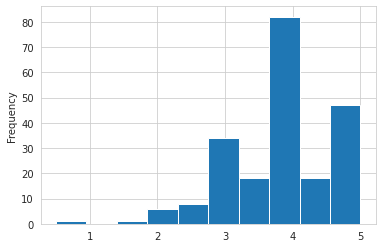

In [114]:
avaliações.query('filmeId == 1')['nota'].plot(kind='hist')

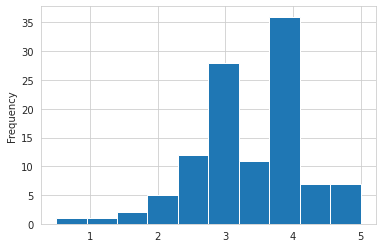

In [115]:
avaliações.query('filmeId == 2')['nota'].plot(kind='hist')

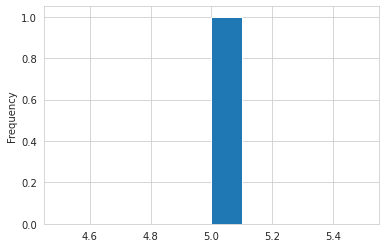

In [116]:
avaliações.query('filmeId == 102084')['nota'].plot(kind='hist')

Desafio 4: Arredondar as médias(coluna de nota média) para duas casas decimais

In [135]:
filmes_com_média = filmes_com_média.round(2)
filmes_com_média.head()

,filmeId,titulo,generos,média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


Desafio 5: Descobrir os gêneros

In [118]:
filmes['generos'].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Desafio 6: Contar o número de aparições de cada gênero

In [119]:
filmes['generos'].str.get_dummies('|').sum().sort_values()

(no genres listed)      34
Film-Noir               87
IMAX                   158
Western                167
Musical                334
War                    382
Documentary            440
Mystery                573
Animation              611
Children               664
Fantasy                779
Horror                 978
Sci-Fi                 980
Crime                 1199
Adventure             1263
Romance               1596
Action                1828
Thriller              1894
Comedy                3756
Drama                 4361
dtype: int64

Plotar o gráfico de aparições de cada gênero. Pode ser um gráfico de tipo igual barra

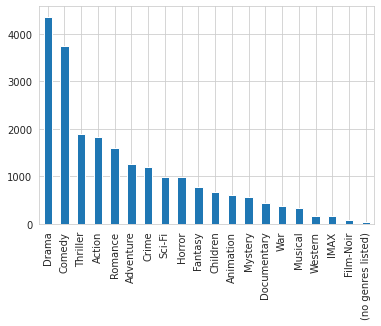

In [120]:
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending = False).plot(kind='bar')

AULA 02

In [121]:
filmes['generos'].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [122]:
filmes.index

RangeIndex(start=0, stop=9742, step=1)

In [123]:
filmes['generos'].str.get_dummies('|').sum().sort_index()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

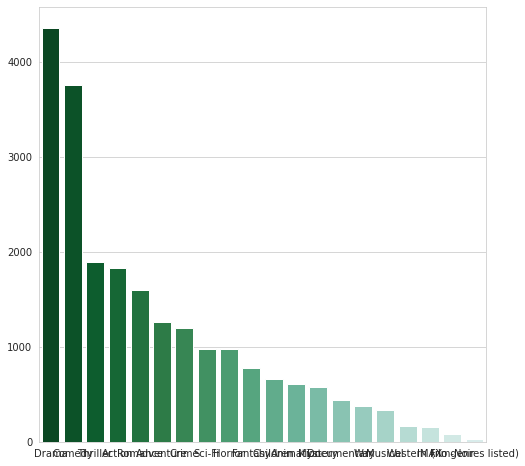

In [125]:

filmes_por_genero = filmes['generos'].str.get_dummies('|').sum().sort_values(ascending = False)
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
sns.barplot(x = filmes_por_genero.index,
            y = filmes_por_genero.values,
            palette = sns.color_palette('BuGn_r', n_colors =len (filmes_por_genero) + 4))
plt.show()


3.9209302325581397


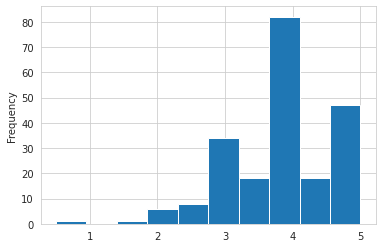

In [126]:
notas_do_filme1 = avaliações.query('filmeId == 1')['nota']
print(notas_do_filme1.mean())
notas_do_filme1.plot(kind='hist')

3.4318181818181817


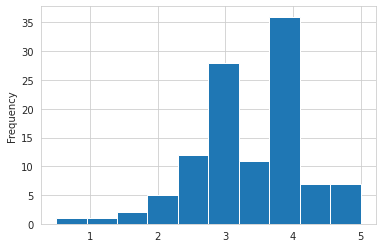

In [127]:
notas_do_filme2 = avaliações.query('filmeId == 2')['nota']
print(notas_do_filme2.mean())
notas_do_filme2.plot(kind='hist')

In [128]:
notas_do_filme2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [129]:
notas_do_filme1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [130]:
filmes_com_média.sort_values('média', ascending = False)[2450:2500]

,filmeId,titulo,generos,média
8765,128620,Victoria (2015),Crime|Drama|Romance,3.90
599,745,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy,3.90
5480,26258,"Topo, El (1970)",Fantasy|Western,3.90
4795,7143,"Last Samurai, The (2003)",Action|Adventure|Drama|War,3.90
5451,26084,"Music Man, The (1962)",Children|Comedy|Musical|Romance,3.90
3016,4034,Traffic (2000),Crime|Drama|Thriller,3.90
4100,5876,"Quiet American, The (2002)",Drama|Thriller|War,3.90
2894,3871,Shane (1953),Drama|Western,3.90
6580,55247,Into the Wild (2007),Action|Adventure|Drama,3.90
2156,2871,Deliverance (1972),Adventure|Drama|Thriller,3.90


In [0]:
def plot_filme(n):
  notas_do_filme = avaliações.query(f'filmeId == {n}')['nota']
  notas_do_filme.plot(kind='hist')
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

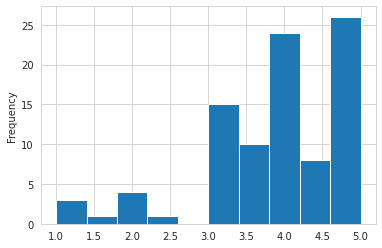

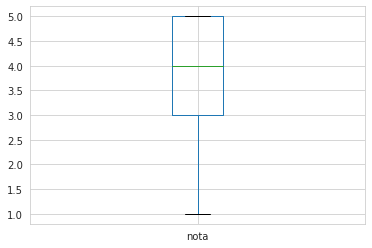

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [132]:
plot_filme(919)

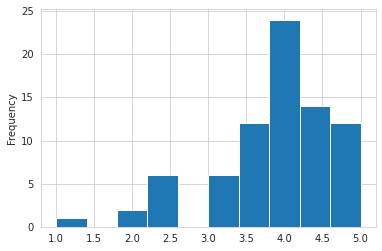

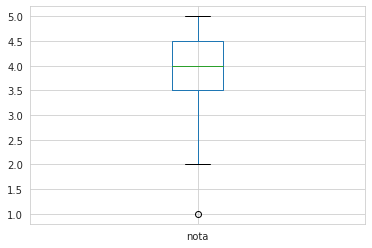

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [133]:
plot_filme(46578)

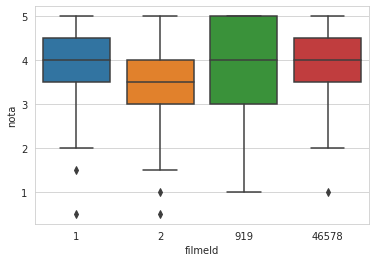

In [134]:
sns.boxplot(data = avaliações.query('filmeId in [1,2,919,46578]'), x = 'filmeId', y = 'nota')